In [5]:
# 开销显示着一个人的消费习惯和消费重点
# 本程序旨在通过记录消费记录的方式，记录本人的消费支出情况，看出在哪方面比重较大

+ 生活用品
+ 教育消费
+ 三餐
+ 零食
+ 饮料
+ 出行

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class diary():
    def __init__(self):
        self.life_obj = {}
        self.edu = {}
        self.meal = {}
        self.snacks = {}
        self.drinks = {}
        self.traffic = {}
        self.diary = []
        self.list = []
        self.date = []
        #self.daything = []
        self.cost = []
    def add(self,date,things):
        self.list.append((date,things))
    def check(self,lei,way,cost):
        category = getattr(self, lei, None)
        if way in category:
                category[way].append(cost)
        else:
                category[way] = [cost]
    def cha_daily(self,date):
         for thing in self.list:
             day = thing[0]
             if date == day:
                  things = thing[1]
                  for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
                  self.draw(date)
    def draw(self,date):
         traffic = sum(sum(value) for value in self.traffic.values())
         meal = sum(sum(value) for value in self.meal.values())
         edu = sum(sum(value) for value in self.edu.values())
         life_obj = sum(sum(value) for value in self.life_obj.values())
         snacks = sum(sum(value) for value in self.snacks.values())
         drinks = sum(sum(value) for value in self.drinks.values())
         X = ['traffic','meal','edu','life_obj','snacks','drinks']
         Y = np.array([traffic,meal,edu,life_obj,snacks,drinks])
         self.draw_bar(date=f'{date}的消费情况',X = X,Y = Y)
         # 设置matplotlib支持中文 
         # 创建条形图
    def draw_bar(self,date,X,Y):
         fig, ax = plt.subplots()
         bars = ax.bar(X, Y)

        # 在每个条形上面显示数值
         for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, '{:.2f}'.format(yval), ha='center', va='bottom')
         plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
         plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示
         plt.title(f'{date}')
         plt.show()
         total = sum(Y)
         print(Y)
         print(f'一共花费{total}元')
    def cha_daily_lei(self,lei,date):
        real_lei = lei
        for thing in self.list:
             day = thing[0]
             if date == day:
                  things = thing[1]
                  for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
        lei = real_lei
        category = getattr(self, lei, None)
        
        X = category.keys()
        Y = [sum(value) for value in category.values()]
        x = []
        for a in X:
            x.append(a)
        Y = np.array(Y)
        X = np.array(x)
        self.draw_bar(X = X,Y = Y,date = f'{date}{lei}的消费情况')
    def cha_series(self,begin,end):
        t = 0
        for thing in self.list:
             day = thing[0]
             if begin == day:
                  things = thing[1]
                  for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
                    t = 1
                  if end == begin:
                      break
                  continue
             if end!=day and t==1:
                 things = thing[1]
                 for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
             if end==day and begin!=end:
                 things = thing[1]
                 for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
        self.draw(date=f'{begin}到{end}的消费情况')
    def cha_series_lei(self,begin,end,lei):
        real_lei = lei
        t = 0
        for thing in self.list:
             day = thing[0]
             if begin == day:
                  things = thing[1]
                  for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
                    t = 1
                  if end == begin:
                      break
                  continue
             if end!=day and t==1:
                 things = thing[1]
                 for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
             if end==day and begin!=end:
                 things = thing[1]
                 for thing1 in things:
                    lei = thing1[0]
                    way = thing1[1][0]
                    cost = thing1[1][1]
                    self.check(lei,way,cost)
        lei = real_lei
        category = getattr(self, lei, None)
        
        X = category.keys()
        Y = [sum(value) for value in category.values()]
        x = []
        for a in X:
            x.append(a)
        Y = np.array(Y)
        X = np.array(x)
        self.draw_bar(X = X,Y = Y,date = f'{begin}到{end}{lei}的消费情况')


+ 一共有6个大类，详情见上，分别为 life_obj(生活用品)，edu（教育花费），meal（三餐）,snacks（零食），drinks（饮料），traffic（交通）
+ 不用关心类里面的函数是如何定义的，会用就行
+ 一共三个函数（add,cha_daily,cha_daily_lei,cha_series）
+ add(date,(种类,(项目,花费)))
+ cha_daily(date)
+ cha_daily_lei(date,种类)
+ cha_series(开始日期,结束日期)

In [7]:
changshi = diary()
changshi.add('9月12日',[('traffic',('一车一人',1.1)),('traffic',('铁塔能源',1.1)),('snacks',('美佳',8.5)),('traffic',('一车一人',1.1)),('meal',('台湾卤肉饭',28)),('traffic',('铁塔能源',1.1)),('traffic',('一车一人',1.1)),('meal',('美团',19.8)),('traffic',('铁塔能源',1.1)),('snacks',('商户祝强',3.5))])
changshi.add('9月13日',[('traffic',('一车一人',1.1)),('drinks',('前街商店',7)),('traffic',('租车',8)),('meal',('沁园餐厅',14)),('snacks',('烤冷面',6.5)),('traffic',('铁塔能源',2.2)),('life_obj',('剪头',25)),('traffic',('铁塔能源',2.2))])
changshi.add('9月14日',[('traffic',('一车一人',1.1)),('edu',('bilibili大会员',15)),('traffic',('铁塔能源',1.1)),('meal',('牛杂',11)),('drinks',('蜜雪',12.8)),('traffic',('铁塔能源',1.1)),('snacks',('水果捞',14.8)),('snacks',('恰货铺子',42.09)),('drinks',('蜜雪',10)),('traffic',('铁塔能源',1.7)),('drinks',('绿豆沙',3))])
changshi.add('9月15日',[('life_obj',('充电费',20)),('edu',('打印综测材料',1.4)),('meal',('中央二楼',16)),('drinks',('瑞幸咖啡',9.9)),('traffic',('铁塔能源',4.7)),('drinks',('矿泉水',2.5)),('meal',('鸡翅包饭',12))]) 

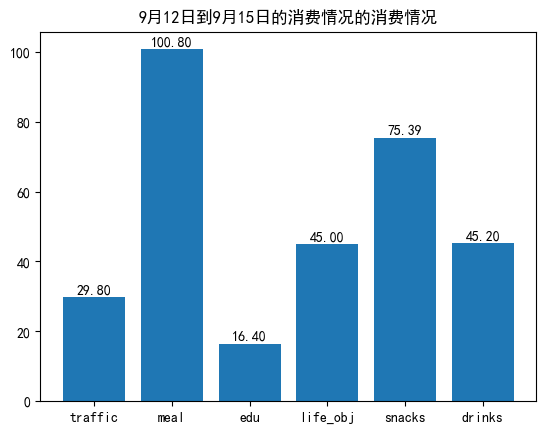

[ 29.8  100.8   16.4   45.    75.39  45.2 ]
一共花费312.59元


In [8]:
changshi.cha_series('9月12日','9月15日')